In [74]:
import pandas as pd
import numpy as np

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import pyplot

In [76]:
x_train = pd.read_csv("adult_train2.csv")
x_test = pd.read_csv("adult_test2.csv")

# 刪除特徵前

In [77]:
x_train_feature = x_train.drop(labels=['Class'],axis=1)
y_train_class = x_train['Class'].values
#'education','marital-status','race','sex','native-country','Class'

In [78]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x_train_feature)
x_scaled = scaler.transform(x_train_feature)
x_train_final=pd.DataFrame(x_scaled,columns=x_train_feature.columns)
x_train_final

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,0.833333,0.043338,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.419355,0.95
1,0.452055,0.666667,0.047277,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.129032,0.95
2,0.287671,0.333333,0.137244,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.419355,0.95
3,0.493151,0.333333,0.150212,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.419355,0.95
4,0.150685,0.333333,0.220703,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.419355,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,0.333333,0.165563,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.397849,0.95
30158,0.315068,0.333333,0.095589,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.419355,0.95
30159,0.561644,0.333333,0.093914,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.419355,0.95
30160,0.068493,0.333333,0.127620,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.204301,0.95


In [52]:
x_test_feature = x_test.drop(labels=['Class'],axis=1)
y_test_class = x_test['Class'].values

In [53]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x_test_feature)
x_scaled = scaler.transform(x_test_feature)
x_test_final=pd.DataFrame(x_scaled,columns=x_test_feature.columns)
x_test_final

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.109589,0.333333,0.144430,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.443182,0.948718
1,0.287671,0.333333,0.051677,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.556818,0.948718
2,0.150685,0.166667,0.219011,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.443182,0.948718
3,0.369863,0.333333,0.099418,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.443182,0.948718
4,0.232877,0.333333,0.125398,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.329545,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.156895,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.443182,0.948718
15056,0.301370,0.333333,0.136723,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.397727,0.948718
15057,0.287671,0.333333,0.244762,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.556818,0.948718
15058,0.369863,0.333333,0.047666,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.443182,0.948718


In [54]:
clf = RandomForestRegressor(n_estimators=1000,max_depth=10, bootstrap = True,random_state=42)
clf.fit(x_train_final, y_train_class)
y_pred = clf.predict(x_test_final)

In [55]:
print('特徵重要程度: ',clf.feature_importances_)

特徵重要程度:  [0.05896974 0.01424519 0.02886141 0.00553692 0.19974442 0.00254326
 0.01993192 0.36495559 0.00259913 0.00256855 0.19445882 0.05807778
 0.04297017 0.00453712]


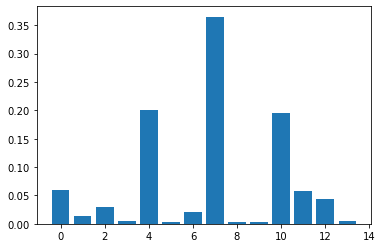

In [56]:
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

<AxesSubplot:>

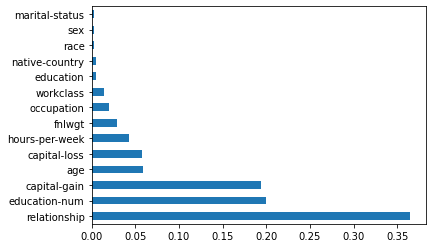

In [58]:
(pd.Series(clf.feature_importances_, index=x_test_final.columns)
   .nlargest(15)
   .plot(kind='barh')) 

In [59]:
print('MAE: ',mean_absolute_error(y_test_class,y_pred))

MAE:  0.2051777023624745


In [61]:
print('MAPE:',mean_absolute_percentage_error(y_test_class,y_pred))

MAPE: 0.15286624147474057


In [60]:
print('RMSE:',mean_squared_error(y_test_class,y_pred,squared=False))

RMSE: 0.3192443484063275


# 刪除重要特徵

In [79]:
x_train_feature2 = x_train_final.drop(labels=['relationship','education-num','capital-gain'],axis=1)
y_train_class2 = x_train['Class'].values

In [80]:
x_test_feature2 = x_test_final.drop(labels=['relationship','education-num','capital-gain'],axis=1)
y_test_class2 = x_test['Class'].values

In [70]:
clf = RandomForestRegressor(n_estimators=1000,max_depth=10, bootstrap = True,random_state=42)
clf.fit(x_train_feature2, y_train_class2)
y_pred = clf.predict(x_test_feature2 )

In [71]:
print('MAE: ',mean_absolute_error(y_test_class2,y_pred))

MAE:  0.23794343909478702


In [73]:
print('MAPE:',mean_absolute_percentage_error(y_test_class2,y_pred))

MAPE: 0.17656333886689898


In [72]:
print('RMSE:',mean_squared_error(y_test_class2,y_pred,squared=False))

RMSE: 0.34192747134068474


# 刪除不重要特徵

In [86]:
x_train_feature3 = x_train_feature.drop(labels=['marital-status','sex','race'],axis=1)
y_train_class3 = x_train['Class'].values

In [87]:
x_test_feature3 = x_test_feature.drop(labels=['marital-status','sex','race'],axis=1)
y_test_class3 = x_test['Class'].values

In [89]:
clf = RandomForestRegressor(n_estimators=1000,max_depth=10, bootstrap = True,random_state=42)
clf.fit(x_train_feature3, y_train_class3)
y_pred = clf.predict(x_test_feature3)

In [90]:
print('MAE: ',mean_absolute_error(y_test_class2,y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test_class2,y_pred))
print('RMSE:',mean_squared_error(y_test_class2,y_pred,squared=False))

MAE:  0.20026911475551637
MAPE: 0.15048443236818135
RMSE: 0.3167001753402388
